# Chargement des données

In [235]:
data <-data.table::fread("http://data.insideairbnb.com/france/ile-de-france/paris/2020-10-12/data/listings.csv.gz",encoding = 'UTF-8')

In [236]:
data2 <-data.table::fread("http://data.insideairbnb.com/france/ile-de-france/paris/2020-10-12/data/calendar.csv.gz",encoding = 'UTF-8')

## Chargement des librairies importantes

In [237]:
library("cowplot")
library("gridExtra")
library("leaflet")
library("ggrepel")
library('dplyr')
library('ggplot2')
library('stringr')
library("tidyr")



## Observation du Data set

In [54]:
data%>%head()

id   listing_url                       scrape_id      last_scraped
1 2577 https://www.airbnb.com/rooms/2577 20201012032825 2020-10-19  
2 3109 https://www.airbnb.com/rooms/3109 20201012032825 2020-10-18  
3 4886 https://www.airbnb.com/rooms/4886 20201012032825 2020-10-18  
4 4890 https://www.airbnb.com/rooms/4890 20201012032825 2020-10-14  
5 5396 https://www.airbnb.com/rooms/5396 20201012032825 2020-10-15  
6 7397 https://www.airbnb.com/rooms/7397 20201012032825 2020-10-16  
  name                                            
1 Loft for 4 by Canal Saint Martin                
2 zen and calm                                    
3 Country-Style Studio Hip Area FREE CRUISE & WIFI
4 Quiet Historic & Cute  +Free Cruise             
5 Explore the heart of old Paris                  
6 MARAIS - 2ROOMS APT - 2/4 PEOPLE                
  description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
1 100 m2 loft (1100 sq feet) with high ceiling, open modern kitchen, cable tv, wifi, sleeping space up to 5 people, Republique area, 5 minutes from the St Martin Canal, Marais area, 10 min from Chatelet and the Louvre.<br /><br /><b>The space</b><br />The district has any service or shop you may desire at a walking distance, many restaurants and clubs as well. <br />I will be pleased to suggest our best addresses and give you directions to have a very enjoyable journey. <br />We have 1 separated bedroom and one mezzanine for the second bed. One bathroom is ""en suite"" to the main bedroom. <br />Welcome to our beautiful loft!<br />Karine                                                                                                                                                                                                                                                                                                                                                                     
2 <b>The space</b><br />I bedroom appartment in Paris 14                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
3 Bright and Cozy Studio Apartment for  2 Guests. Enjoy Great Authentic and Central Location near Canal St Martin and Republique. Historic Building with 

In [39]:
data2%>%head()

listing_id date       available price   adjusted_price minimum_nights
1  2577      2020-10-19 f         $125.00 $125.00        3             
2 73533      2020-10-20 t         $95.00  $95.00         2             
3 73533      2020-10-21 t         $95.00  $95.00         2             
4 73533      2020-10-22 t         $95.00  $95.00         2             
5 73533      2020-10-23 t         $95.00  $95.00         2             
6 73533      2020-10-24 t         $95.00  $95.00         2             
  maximum_nights
1 1125          
2 1125          
3 1125          
4 1125          
5 1125          
6 1125

In [7]:
sapply(data2,class)

$listing_id
[1] "integer"

$date
[1] "IDate" "Date" 

$available
[1] "character"

$price
[1] "character"

$adjusted_price
[1] "character"

$minimum_nights
[1] "integer"

$maximum_nights
[1] "integer"

In [81]:
sapply(data,class)


$id
[1] "integer"

$listing_url
[1] "character"

$scrape_id
[1] "integer64"

$last_scraped
[1] "IDate" "Date" 

$name
[1] "character"

$description
[1] "character"

$neighborhood_overview
[1] "character"

$picture_url
[1] "character"

$host_id
[1] "integer"

$host_url
[1] "character"

$host_name
[1] "character"

$host_since
[1] "IDate" "Date" 

$host_location
[1] "character"

$host_about
[1] "character"

$host_response_time
[1] "character"

$host_response_rate
[1] "character"

$host_acceptance_rate
[1] "character"

$host_is_superhost
[1] "character"

$host_thumbnail_url
[1] "character"

$host_picture_url
[1] "character"

$host_neighbourhood
[1] "character"

$host_listings_count
[1] "integer"

$host_total_listings_count
[1] "integer"

$host_verifications
[1] "character"

$host_has_profile_pic
[1] "character"

$host_identity_verified
[1] "character"

$neighbourhood
[1] "character"

$neighbourhood_cleansed
[1] "character"

$neighbourhood_group_cleansed
[1] "logical"

$latitude
[1] "numeric"

$longitude
[1] "numeric"

$property_type
[1] "character"

$room_type
[1] "character"

$accommodates
[1] "integer"

$bathrooms
[1] "logical"

$bathrooms_text
[1] "character"

$bedrooms
[1] "integer"

$beds
[1] "integer"

$amenities
[1] "character"

$price
[1] "character"

$minimum_nights
[1] "integer"

$maximum_nights
[1] "integer"

$minimum_minimum_nights
[1] "integer"

$maximum_minimum_nights
[1] "integer"

$minimum_maximum_nights
[1] "integer"

$maximum_maximum_nights
[1] "integer"

$minimum_nights_avg_ntm
[1] "numeric"

$maximum_nights_avg_ntm
[1] "numeric"

$calendar_updated
[1] "logical"

$has_availability
[1] "character"

$availability_30
[1] "integer"

$availability_60
[1] "integer"

$availability_90
[1] "integer"

$availability_365
[1] "integer"

$calendar_last_scraped
[1] "IDate" "Date" 

$number_of_reviews
[1] "integer"

$number_of_reviews_ltm
[1] "integer"

$number_of_reviews_l30d
[1] "integer"

$first_review
[1] "IDate" "Date" 

$last_review
[1] "IDate" "Date" 

$review_scores_rating
[1] "integer"

$review_scores_accuracy
[1] "integer"

$review_scores_cleanliness
[1] "integer"

$review_scores_checkin
[1] "integer"

$review_scores_communication
[1] "integer"

$review_scores_location
[1] "integer"

$review_scores_value
[1] "integer"

$license
[1] "character"

$instant_bookable
[1] "character"

$calculated_host_listings_count
[1] "integer"

$calculated_host_listings_count_entire_homes
[1] "integer"

$calculated_host_listings_count_private_rooms
[1] "integer"

$calculated_host_listings_count_shared_rooms
[1] "integer"

$reviews_per_month
[1] "numeric"

In [ ]:
'latitude', 'longitude','room type'

In [20]:
head(data)

id   listing_url                       scrape_id      last_scraped
1 2577 https://www.airbnb.com/rooms/2577 20201012032825 2020-10-19  
2 3109 https://www.airbnb.com/rooms/3109 20201012032825 2020-10-18  
3 4886 https://www.airbnb.com/rooms/4886 20201012032825 2020-10-18  
4 4890 https://www.airbnb.com/rooms/4890 20201012032825 2020-10-14  
5 5396 https://www.airbnb.com/rooms/5396 20201012032825 2020-10-15  
6 7397 https://www.airbnb.com/rooms/7397 20201012032825 2020-10-16  
  name                                            
1 Loft for 4 by Canal Saint Martin                
2 zen and calm                                    
3 Country-Style Studio Hip Area FREE CRUISE & WIFI
4 Quiet Historic & Cute  +Free Cruise             
5 Explore the heart of old Paris                  
6 MARAIS - 2ROOMS APT - 2/4 PEOPLE                
  description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
1 100 m2 loft (1100 sq feet) with high ceiling, open modern kitchen, cable tv, wifi, sleeping space up to 5 people, Republique area, 5 minutes from the St Martin Canal, Marais area, 10 min from Chatelet and the Louvre.<br /><br /><b>The space</b><br />The district has any service or shop you may desire at a walking distance, many restaurants and clubs as well. <br />I will be pleased to suggest our best addresses and give you directions to have a very enjoyable journey. <br />We have 1 separated bedroom and one mezzanine for the second bed. One bathroom is ""en suite"" to the main bedroom. <br />Welcome to our beautiful loft!<br />Karine                                                                                                                                                                                                                                                                                                                                                                     
2 <b>The space</b><br />I bedroom appartment in Paris 14                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
3 Bright and Cozy Studio Apartment for  2 Guests. Enjoy Great Authentic and Central Location near Canal St Martin and Republique. Historic Building with 

# Nombre d'habitation par quartier

In [18]:
test<-data%>%select(id,property_type,neighbourhood_cleansed,neighbourhood,host_neighbourhood)
##test des differente variable neighbourhood pour voir celle qui est la plus pertinante
t2<-test%>%select(host_neighbourhood)%>%unique%>%count
test%>%select(host_neighbourhood)%>%unique

host_neighbourhood               
1   République                       
2   Alésia                           
3   Saint-Paul - Ile Saint-Louis     
4   Le Marais                        
5   Gare du Nord - Gare de I'Est     
6   Châtelet - Les Halles - Beaubourg
7   Montmartre                       
8   Saint-Lazare                     
9   Place d'Italie - Quartier Chinois
10  XI Arrondissement                
11  Austerlitz                       
12  Saint-Germain-des-Prés - Odéon   
13  La Villette                      
14  Pigalle - Saint-Georges          
15  La Chapelle                      
16  Panthéon                         
17  Invalides - Ecole Militaire      
18  Nation                           
19  Porte de Clignancourt            
20  Madeleine - Vendôme              
21  Notre Dame - Ile de La Cité      
22  Père Lachaise - Ménilmontant     
23  Monceau                          
24  Louvre - Tuileries               
25  Tour Eiffel - Champ de Mars      
26  Batignolles                      
27  Buttes-Chaumont - Belleville     
28  Montparnasse                     
29  Bastille                         
30  Vaugirard                        
... ...                              
249 Le Piol                          
250 Campo Marzo                      
251 Eimsbüttel                       
252 Williamsburg                     
253 Almagro                          
254 Flagey                           
255 La Nova Esquerra de l'Eixample   
256 Mid-Beach                        
257 Bloomsbury                       
258 Shadyside                        
259 Esquilino                        
260 Basmanny                         
261 Gambetta                         
262 3rd Arrondissement               
263 Bol                              
264 Longchamp                        
265 Bela Vista                       
266 Montredon                        
267 District II.                     
268 Staré Mesto                      
269 Outremont                        
270 Marylebone                       
271 Sai Ying Pun                     
272 Altona                           
273 Charlottenburg                   
274 Ormond/McKinnon                  
275 Kensington                       
276 Hengshan                         
277 Santo Spirito-San Frediano       
278 Alta Mesa Community Association

In [20]:
t2

n  
1 278

host_neighbourhood n'est pas exploitable. En effet un meme arrondissement correspond a plusieur nom différent ,en plus certain host ne vive pas en france ce qui inclu des host_neighbourhood international comme 'City of London' .

In [63]:
test%>%select(neighbourhood_cleansed)%>%unique%>%count()

n 
1 20

On trouve 20 unique neighbourhood_cleansed,nous allons donc partir sur cette variable pour fixer les quartier

In [51]:
type_appart_quartier<-data%>%select(property_type,neighbourhood_cleansed,listing_url,id)
type_appart_quartier%>%select(listing_url)%>%unique%>%count()

n    
1 66334

In [52]:
type_appart_quartier%>%select(id)%>%count()

n    
1 66334

listing_url correspond à l'url d'un appartement disponible sur le site airbnb paris. Il y a autant d'url 'unique' que d'annonce , il n'y à donc pas d'annonce en double.

In [53]:
appart_quartier<-type_appart_quartier%>%group_by(neighbourhood_cleansed)%>%count()%>%arrange(desc(n))
appart_quartier

neighbourhood_cleansed n   
1  Buttes-Montmartre      7474
2  Popincourt             6459
3  Vaugirard              4977
4  Entrepôt               4628
5  Batignolles-Monceau    4494
6  Ménilmontant           3825
7  Buttes-Chaumont        3813
8  Passy                  3267
9  Opéra                  3235
10 Temple                 3090
11 Reuilly                2731
12 Observatoire           2548
13 Gobelins               2330
14 Bourse                 2286
15 Panthéon               2198
16 Hôtel-de-Ville         2009
17 Luxembourg             1958
18 Palais-Bourbon         1829
19 Élysée                 1789
20 Louvre                 1394

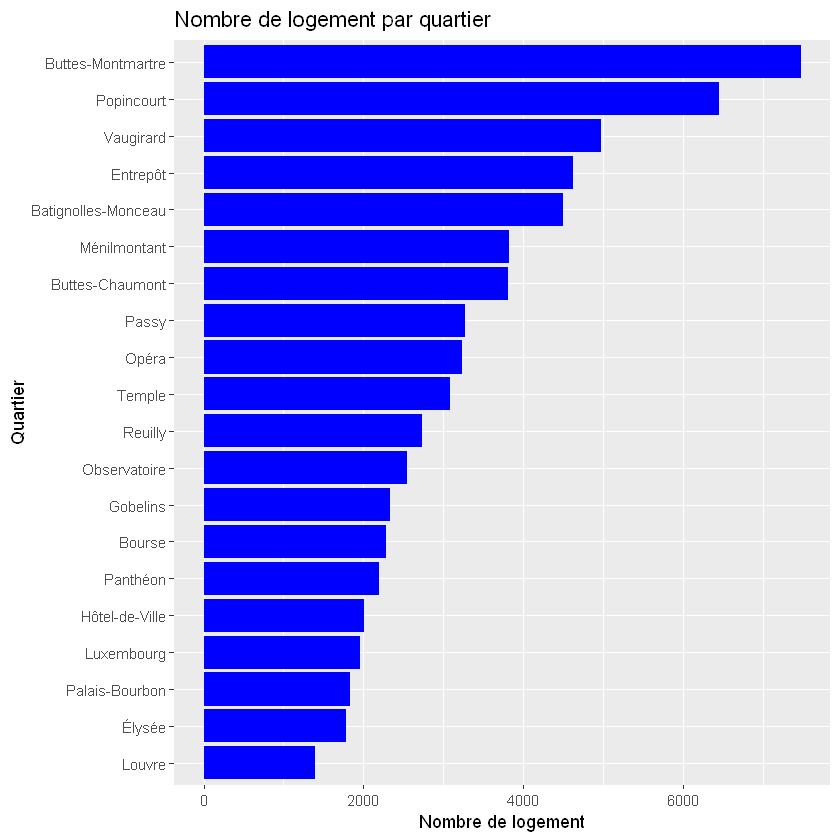

In [54]:
appart_quartier %>% ggplot(aes(x =reorder(neighbourhood_cleansed,n),y=n,))+
geom_col(fill='blue')+ 
coord_flip ()+
labs(title = "Nombre de logement par quartier", # title
        x = "Quartier", # x axis
        y = "Nombre de logement")###changer le nom des axes

# Type d'habitation dans Paris

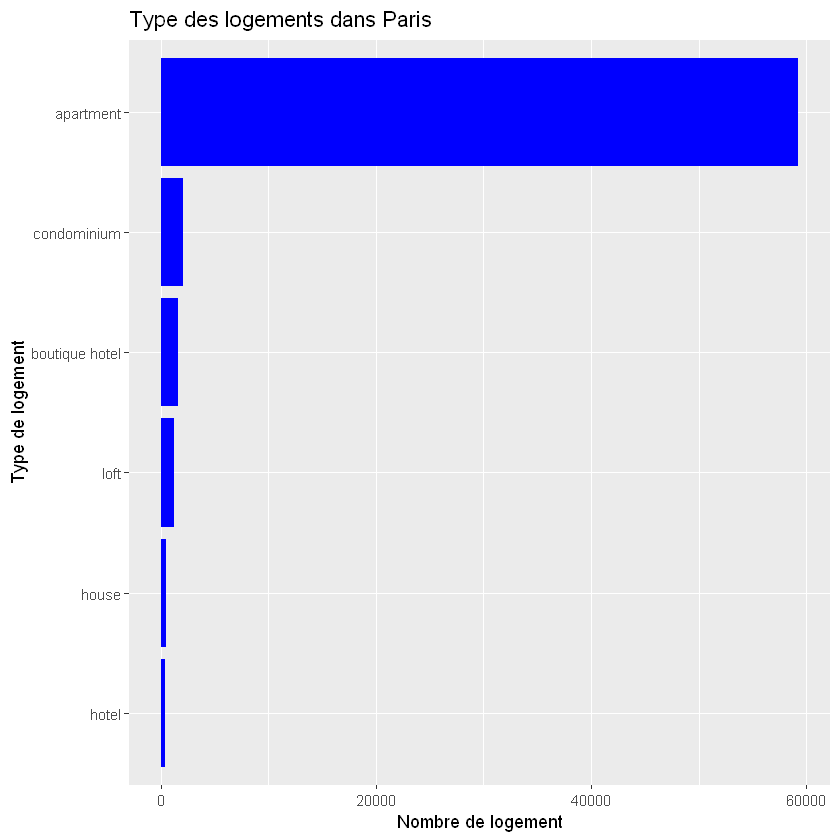

In [14]:
test<-data%>%group_by(property_type)%>%count()%>%arrange(desc(n))%>%filter(n>350)
test %>% ggplot(aes(x =reorder(property_type,n),y=n)) + 
geom_col(fill='blue')+ 
coord_flip ()+
labs(title = "Type des logements dans Paris",
        x = "Type de logement", 
        y = "Nombre de logement") ##rajouter detail et filter

# property type en fonction des room_type

In [22]:
data$property_type<-str_replace_all(data$property_type,pattern='Entire ',replacement='')
data$property_type<-str_replace_all(data$property_type,pattern='Private ',replacement='')
data$property_type<-str_replace_all(data$property_type,pattern='Shared ',replacement='')
data$property_type<-str_replace_all(data$property_type,pattern='Room in ',replacement='')
data$property_type<-str_replace_all(data$property_type,pattern='room in ',replacement='')


In [23]:
data%>%group_by(property_type,room_type,available=T)%>%count()%>%filter(n>100)

property_type      room_type       available n    
1  apartment          Entire home/apt TRUE      53359
2  apartment          Private room    TRUE       5628
3  apartment          Shared room     TRUE        298
4  bed and breakfast  Private room    TRUE        137
5  boutique hotel     Hotel room      TRUE       1105
6  boutique hotel     Private room    TRUE        524
7  condominium        Entire home/apt TRUE       1751
8  condominium        Private room    TRUE        304
9  hotel              Hotel room      TRUE        132
10 hotel              Private room    TRUE        289
11 house              Entire home/apt TRUE        362
12 house              Private room    TRUE        115
13 loft               Entire home/apt TRUE       1139
14 serviced apartment Entire home/apt TRUE        172
15 townhouse          Entire home/apt TRUE        168

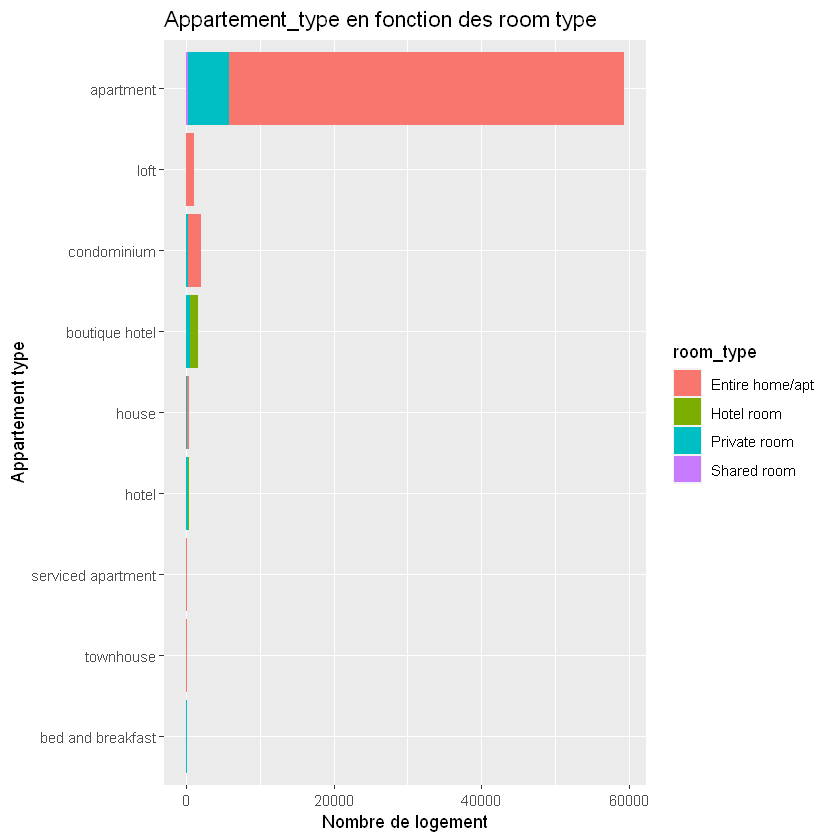

In [24]:
data%>%group_by(property_type,room_type,available=T)%>%count()%>%filter(n>100)%>%ggplot(aes(x =reorder(property_type,n),y=n,fill=room_type)) + 
geom_col()+ 
coord_flip ()+
labs(title = "Appartement_type en fonction des room type",
        x = "Appartement type", 
        y = "Nombre de logement")


# Nombre de personne par réservation (accomodate)

In [238]:
t<-data%>%group_by(accommodates)%>%count()

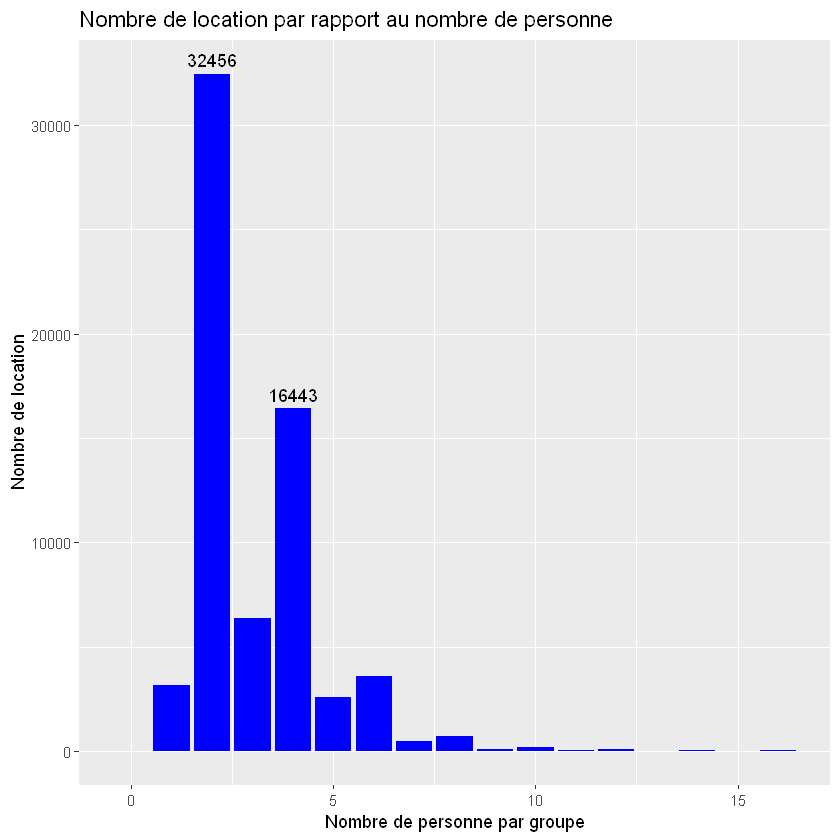

In [239]:
ggplot(t,aes(x =accommodates,y=n,label = n)) + 
geom_col(fill='blue') +
geom_text_repel(data = subset(t, n > 7000),nudge_y =36)+
labs(title = "Nombre de location par rapport au nombre de personne ", # title
        x = "Nombre de personne par groupe", # x axis
        y = "Nombre de location")

# Prix moyen pour 2 personne / par quartiers

In [ ]:
price de listing -> convertir en euros

In [26]:
data$price <- gsub('\\,','',data$price)
data$price <- as.numeric(gsub('\\$','',data$price))
data<-data%>%mutate(price_euro=price*0.84)

In [27]:
p2p<-data%>%select(price_euro,accommodates,neighbourhood_cleansed)%>%filter(accommodates==2)

In [28]:
p2p<-p2p%>%group_by(neighbourhood_cleansed)%>%summarise(mean(price_euro))
names(p2p)<-c('neighbourhood','price')

`summarise()` ungrouping output (override with `.groups` argument)


In [29]:
p2p

neighbourhood       price    
1  Batignolles-Monceau  66.97662
2  Bourse               78.94394
3  Buttes-Chaumont      50.12221
4  Buttes-Montmartre    59.34288
5  Élysée              118.69952
6  Entrepôt             62.01704
7  Gobelins             55.07592
8  Hôtel-de-Ville       87.90575
9  Louvre              102.84002
10 Luxembourg           93.87855
11 Ménilmontant         50.28164
12 Observatoire         59.38538
13 Opéra                75.78249
14 Palais-Bourbon      107.40619
15 Panthéon             73.51896
16 Passy                84.85729
17 Popincourt           63.73263
18 Reuilly              56.77293
19 Temple               88.79834
20 Vaugirard            69.44360

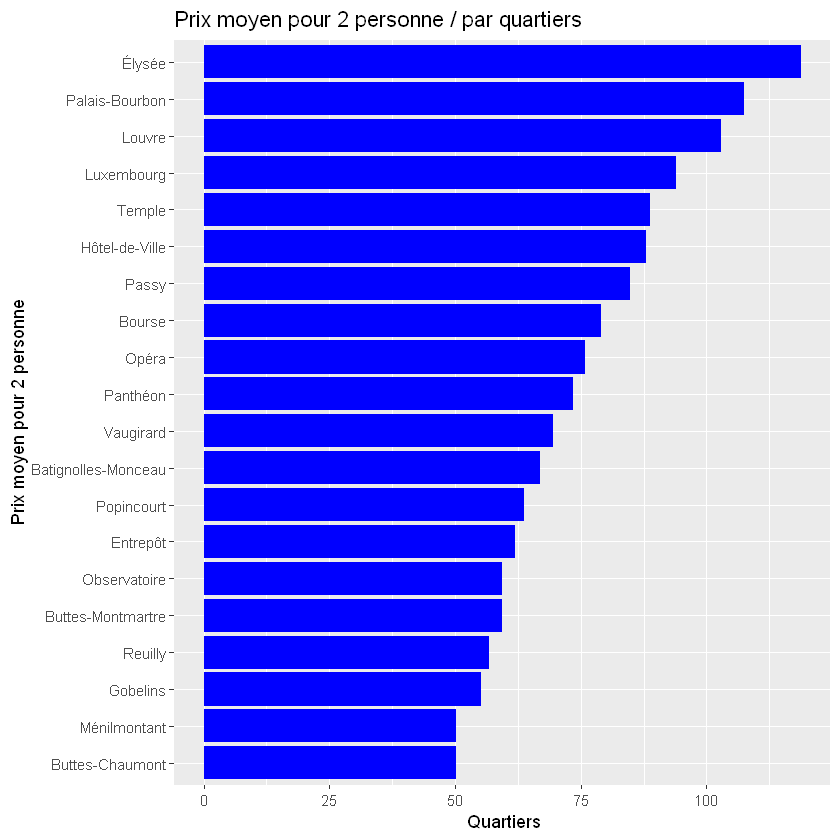

In [30]:
ggplot(p2p,aes(x =reorder(neighbourhood,price),y=price)) + 
geom_col(fill='blue')+
coord_flip ()+
labs(title = "Prix moyen pour 2 personne par quartiers ", # title
        x = "Prix moyen pour 2 personne", # x axis
        y = " Quartiers")

# carte 1

In [44]:
Paris_carte<-leaflet()%>%addTiles()%>%addMarkers(lng=data$longitude,
                                                lat=data$latitude,
                                                clusterOptions=markerClusterOptions(),
                                                popup=paste('logement disponible pour',data$accommodates,'personnes'),
                                               ) %>%

  addEasyButton(button = easyButton(icon = "fa-globe", title = "Zoom initial",onClick = JS("function(btn, map){ map.setZoom(11); }")))
                                                

In [45]:
Paris_carte

HTML widgets cannot be represented in plain text (need html)

# carte 2

In [240]:
library('rgdal')

In [241]:
Paris<-rgdal::readOGR("https://www.data.gouv.fr/fr/datasets/r/4765fe48-35fd-4536-b029-4727380ce23c")

OGR data source with driver: GeoJSON 
Source: "https://www.data.gouv.fr/fr/datasets/r/4765fe48-35fd-4536-b029-4727380ce23c", layer: "4765fe48-35fd-4536-b029-4727380ce23c"
with 20 features
It has 9 fields, of which 1 list fields


In [242]:
paris_carte2 <- leaflet(Paris) %>% addTiles() %>% 
              addMarkers(lng=2.3488, lat=48.8534) %>%
              addPolygons()

In [243]:
paris_carte2

HTML widgets cannot be represented in plain text (need html)

In [244]:
appart_quartier$neighbourhood_cleansed <- Paris$c_arinsee
bins <- c(1000, 2000, 3000, 4000, 6000, 7000, 8000)

pal <- colorBin("YlOrRd", domain = appart_quartier$n, bins = bins)

paris_mapbis <- leaflet(Paris) %>% addTiles() %>% 
              addMarkers(lng=2.3488, lat=48.8534) %>%
              addPolygons( fillColor = ~pal(appart_quartier$n),
                               weight = 2,
                               opacity = 9,
                               color = "blue",
                  
  dashArray = "5",
                               fillOpacity = 0.4) %>% 
   addLegend(pal = pal, values = ~bins, opacity = 0.7, title = "logement proposé",
    position = "topright")%>%

  addEasyButton(button = easyButton(icon = "fa-globe", title = "Zoom initial",onClick = JS("function(btn, map){ map.setZoom(12); }")))
                                                


paris_carte2bis

ERROR: Error in eval(expr, envir, enclos): objet 'paris_carte2bis' introuvable


# Prix moyen pour 2 personnes / temps

In [11]:
data2$price <- gsub('\\,','',data2$price)
data2$price <- as.numeric(gsub('\\$','',data2$price))

#data2$price <- gsub('\\,','',data2$price)

In [12]:
data2<-data2%>%mutate(price_euro=price*0.84)

In [13]:
data2%>%head()


listing_id date       available price adjusted_price minimum_nights
1  2577      2020-10-19 f         125   $125.00        3             
2 73533      2020-10-20 t          95   $95.00         2             
3 73533      2020-10-21 t          95   $95.00         2             
4 73533      2020-10-22 t          95   $95.00         2             
5 73533      2020-10-23 t          95   $95.00         2             
6 73533      2020-10-24 t          95   $95.00         2             
  maximum_nights price_euro
1 1125           105.0     
2 1125            79.8     
3 1125            79.8     
4 1125            79.8     
5 1125            79.8     
6 1125            79.8

In [14]:
tarif_euro<-data2%>%select(listing_id,price_euro,date,available)
names(tarif_euro)<-c('id','price_euro','date','available')

In [15]:
two_people<-data%>%select(id,accommodates)

In [16]:
t2p<-left_join(tarif_euro,two_people,by='id')

In [19]:
t2p<-t2p%>%filter(accommodates==2,available=='t')
t2p

id       price_euro date       available accommodates
1       21419    57.96      2020-11-06 t         2           
2       21419    57.96      2020-11-07 t         2           
3       21419    57.96      2020-11-28 t         2           
4       21419    57.96      2020-11-29 t         2           
5       21419    57.96      2020-11-30 t         2           
6       21419    52.92      2020-12-02 t         2           
7       21419    53.76      2020-12-03 t         2           
8       21419    54.60      2020-12-04 t         2           
9       21419    53.76      2020-12-05 t         2           
10      21419    52.08      2020-12-06 t         2           
11      21419    53.76      2020-12-07 t         2           
12      21419    53.76      2020-12-08 t         2           
13      21419    54.60      2020-12-09 t         2           
14      21419    54.60      2020-12-10 t         2           
15      21419    55.44      2020-12-11 t         2           
16      21419    55.44      2020-12-12 t         2           
17      21419    53.76      2020-12-13 t         2           
18      21419    54.60      2020-12-14 t         2           
19      21419    55.44      2020-12-15 t         2           
20      21419    55.44      2020-12-16 t         2           
21      21419    55.44      2020-12-17 t         2           
22      21419    55.44      2020-12-18 t         2           
23      21419    55.44      2020-12-19 t         2           
24      21419    54.60      2020-12-20 t         2           
25      21419    54.60      2020-12-21 t         2           
26      21419    54.60      2020-12-22 t         2           
27      21419    75.60      2020-12-23 t         2           
28      21419    75.60      2020-12-24 t         2           
29      21419    75.60      2020-12-25 t         2           
30      21419    75.60      2020-12-26 t         2           
...     ...      ...        ...        ...       ...         
2897336 45284189 49.56      2021-06-30 t         2           
2897337 45284189 49.56      2021-07-01 t         2           
2897338 45284189 49.56      2021-07-02 t         2           
2897339 45284189 49.56      2021-07-03 t         2           
2897340 45284189 49.56      2021-07-04 t         2           
2897341 45284189 49.56      2021-07-05 t         2           
2897342 45284189 49.56      2021-07-06 t         2           
2897343 45284189 49.56      2021-07-07 t         2           
2897344 45284189 49.56      2021-07-08 t         2           
2897345 45284189 49.56      2021-07-09 t         2           
2897346 45284189 49.56      2021-07-10 t         2           
2897347 45284189 49.56      2021-07-11 t         2           
2897348 36270333 58.80      2021-01-01 t         2           
2897349 36270333 58.80      2021-01-02 t         2           
2897350 36270333 58.80      2021-01-03 t         2           
2897351 36270333 58.80      2021-01-04 t         2           
2897352 36270333 58.80      2021-01-05 t         2           
2897353 36270333 58.80      2021-01-06 t         2           
2897354 36270333 58.80      2021-01-07 t         2           
2897355 36270333 58.80      2021-01-08 t         2           
2897356 36270333 58.80      2021-01-09 t         2           
2897357 36270333 58.80      2021-01-10 t         2           
2897358 36270333 58.80      2021-01-11 t         2           
2897359 36270333 58.80      2021-01-12 t         2           
2897360 36270333 58.80      2021-01-13 t         2           
2897361 36270333 58.80      2021-01-14 t         2           
2897362 36270333 58.80      2021-01-15 t         2           
2897363 36270333 58.80      2021-01-16 t         2           
2897364 36270333 58.80      2021-01-17 t         2           
2897365 36270333 58.80      2021-01-18 t         2

In [20]:
d2<-t2p%>%group_by(date)%>%summarise(mean(price_euro))
names(d2)<-c('date','prix_moyen')

`summarise()` ungrouping output (override with `.groups` argument)


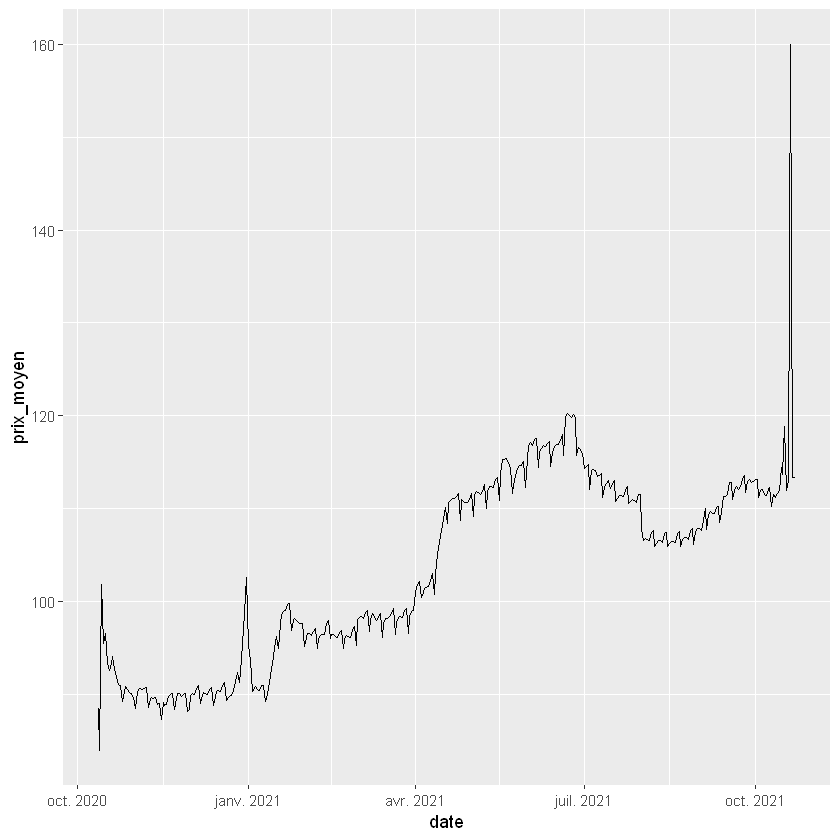

In [21]:
ggplot(d2,aes(x =date,y=prix_moyen)) + 
geom_line()

# Nombre logement dispo par jour

In [224]:


logdispo<-data2%>%filter(available=='t')%>%group_by(date)%>%count
names(logdispo)<-c('date','nombre_de_dispo')

In [225]:
logdispo

date       nombre_de_dispo
1   2020-10-12    22          
2   2020-10-13    38          
3   2020-10-14   776          
4   2020-10-15  3042          
5   2020-10-16  5465          
6   2020-10-17  7988          
7   2020-10-18 10642          
8   2020-10-19 12624          
9   2020-10-20 14340          
10  2020-10-21 15499          
11  2020-10-22 16500          
12  2020-10-23 17319          
13  2020-10-24 17602          
14  2020-10-25 18191          
15  2020-10-26 18115          
16  2020-10-27 18083          
17  2020-10-28 18251          
18  2020-10-29 18502          
19  2020-10-30 18921          
20  2020-10-31 19386          
21  2020-11-01 20008          
22  2020-11-02 19489          
23  2020-11-03 19380          
24  2020-11-04 19408          
25  2020-11-05 19517          
26  2020-11-06 19851          
27  2020-11-07 19925          
28  2020-11-08 20107          
29  2020-11-09 19986          
30  2020-11-10 19964          
... ...        ...            
348 2021-09-24 16189          
349 2021-09-25 16184          
350 2021-09-26 16230          
351 2021-09-27 16225          
352 2021-09-28 16232          
353 2021-09-29 16235          
354 2021-09-30 16272          
355 2021-10-01 16301          
356 2021-10-02 16296          
357 2021-10-03 16320          
358 2021-10-04 16323          
359 2021-10-05 16328          
360 2021-10-06 16331          
361 2021-10-07 16336          
362 2021-10-08 16347          
363 2021-10-09 16326          
364 2021-10-10 16323          
365 2021-10-11 16347          
366 2021-10-12 16319          
367 2021-10-13 16331          
368 2021-10-14 14958          
369 2021-10-15 11320          
370 2021-10-16  8862          
371 2021-10-17  6554          
372 2021-10-18  3417          
373 2021-10-19  1892          
374 2021-10-20   273          
375 2021-10-21     8          
376 2021-10-22     8          
377 2021-10-23     8

In [226]:
2021-01-09,2021-04-09


ERROR: Error in parse(text = x, srcfile = src): <text>:1:11: ',' inattendu(e)
1: 2021-01-09,
              ^


In [227]:
logdispo%>%filter(date=='2021-01-09')

date       nombre_de_dispo
1 2021-01-09 24334

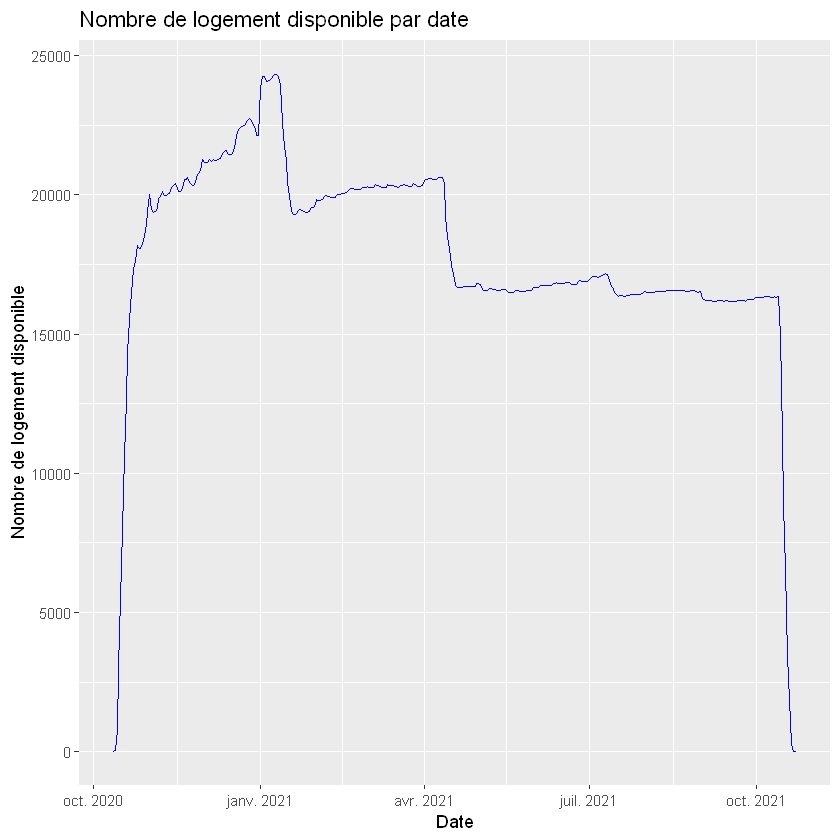

In [231]:
ggplot(logdispo,aes(x =date,y=nombre_de_dispo)) + 
geom_line(col='blue')+
labs(title = "Nombre de logement disponible par date ", # title
        x = "Date", # x axis
        y = "Nombre de logement disponible")


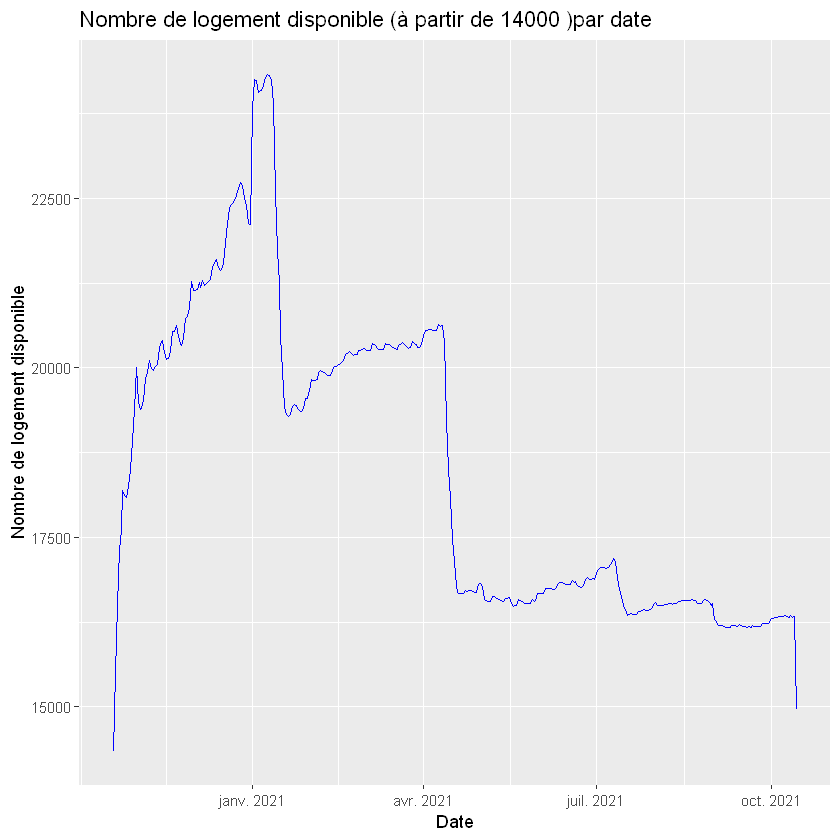

In [234]:
logdispo2<-logdispo%>%filter(nombre_de_dispo>14000)
ggplot(logdispo2,aes(x =date,y=nombre_de_dispo)) + 
geom_line(col='blue')+
labs(title = "Nombre de logement disponible (à partir de 14000 )par date ", # title
        x = "Date", # x axis
        y = "Nombre de logement disponible")


#affiher date debut 1er pick , 2eme , 3eme

# Nombre d'habitation par Type/quartier

In [37]:
data$room_type%>%unique

[1] "Entire home/apt" "Private room"    "Hotel room"      "Shared room"

In [97]:
Entire_h_a<-data%>%select(room_type,neighbourhood_cleansed)%>%filter(room_type=='Entire home/apt')%>%group_by(neighbourhood_cleansed)%>%count

Private_room<-data%>%select(room_type,neighbourhood_cleansed)%>%filter(room_type=='Private room')%>%group_by(neighbourhood_cleansed)%>%count

Hotel_room<-data%>%select(room_type,neighbourhood_cleansed)%>%filter(room_type=='Hotel room')%>%group_by(neighbourhood_cleansed)%>%count

Shared_room<-data%>%select(room_type,neighbourhood_cleansed)%>%filter(room_type=='Shared room')%>%group_by(neighbourhood_cleansed)%>%count

graphique pour chacun et regrouper les 4 ensembles

In [152]:
P1<-ggplot(Entire_h_a,aes(x =reorder(neighbourhood_cleansed,n),y=n)) + 
    geom_col(fill='black')+
    coord_flip ()+
    labs(title = "Maison/appartement par quartier", # title
        x = "Quartier", # x axis
        y = "Nombre de logement disponible")+ 
    theme(plot.title = element_text(size=9))


p2<-ggplot(Private_room,aes(x =reorder(neighbourhood_cleansed,n),y=n)) + 
    geom_col(fill='dark blue')+
    coord_flip ()+
    labs(title = "Chambre privé par quartier", # title
        x = "Quartier", # x axis
        y = "Nombre de logement disponible")+ 
    theme(plot.title = element_text(size=9))

p3<-ggplot(Hotel_room,aes(x =reorder(neighbourhood_cleansed,n),y=n)) + 
    geom_col(fill='dark red')+
    coord_flip ()+
    labs(title = "Chambre d'Hotel par quartier", # title
        x = "Quartier", # x axis
        y = "Nombre de logement disponible")+ 
    theme(plot.title = element_text(size=9))




p4<-ggplot(Shared_room,aes(x =reorder(neighbourhood_cleansed,n),y=n)) + 
    geom_col(fill='dark green')+
    coord_flip ()+
    labs(title = "Chambre partagée par quartier", # title
        x = "Quartier", # x axis
        y = "Nombre de logement disponible")+ 
    theme(plot.title = element_text(size=9))



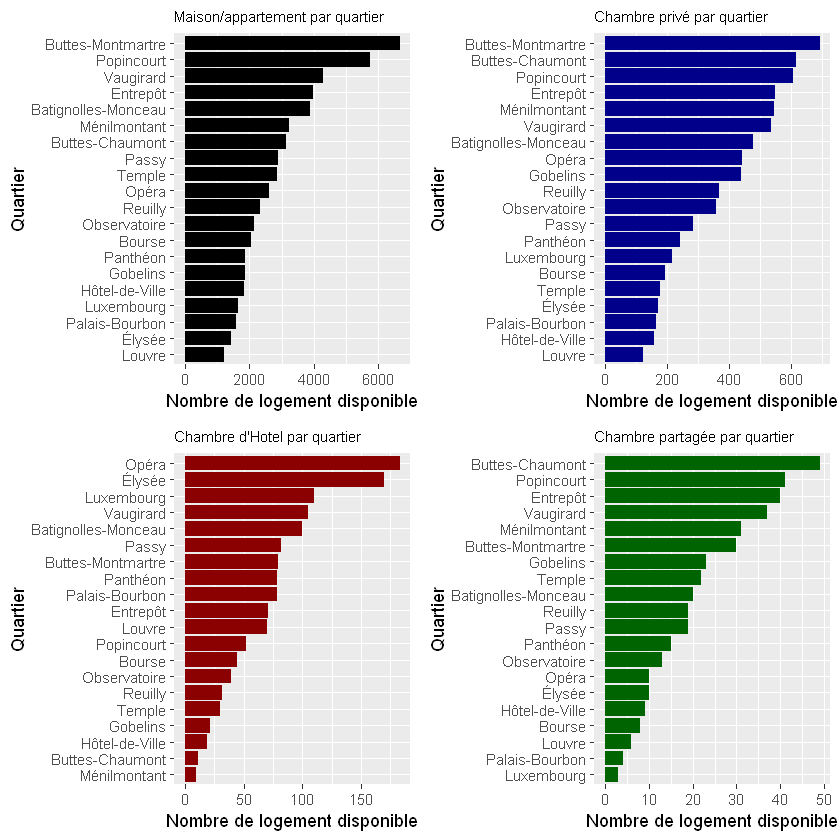

In [153]:
plot_grid(P1, p2,p3,p4, ncol = 2, nrow = 2)